In [1]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *



processGens=ProcessGens()


# process_gen_modes=["fairseq_softmax", "fairseq_sparsemax"]
process_gen_modes=["fairseq_sparsemax", "fairseq_softmax"]



dfs_by_model,processGens,(root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric)= get_dfs_by_model(process_gen_modes)

for key, filtered_df in dfs_by_model.items():
    filtered_df=filtered_df.drop_duplicates(["instanceID", "example_idx"])
    filtered_df["output_logprob"]=pd.to_numeric(filtered_df["output_logprob"])
    dfs_by_model[key]=filtered_df
    
examples_df = pd.concat(list(dfs_by_model.values()))



# processGens.init_with_mode(process_gen_modes)
# root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric = processGens.get_params()

# examples_df, completions_df=get_dfs(processGens)



# dfs_by_model={}

# for model_name in examples_df['model'].unique():
#     filtered_df = examples_df[examples_df["model"]==model_name]
    

    
#     dfs_by_model[model_name]=filtered_df
    
# examples_df = pd.concat(list(dfs_by_model.values()))






/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.


mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']


/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_65077/3324418358.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["output_logprob"]=pd.to_numeric(filtered_df["output_logprob"])


In [2]:

from calculate_metrics import Calculate_Metrics
#We want 1000 instanceID and 100 each
df = next(iter(dfs_by_model.values()))

# print(df["output_logprob"].mean())
metrics=Calculate_Metrics(df, compare_metric).get_best_metrics()


# df2=df[["output_logprob", "rank"]]
# print(df2[~df2.applymap(np.isreal).all(1)])





  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [3]:
print(f"\t root_folder: {root_folder} \n \t num_beams_list {num_beams_list} \n \t models: {models} \n \t custom_metrics{[metric.name() for metric in custom_metrics]}"+ 
    f"\n \t task_names {task_names} \n \t suite_name {suite_name} \n \t instance_metrics {instance_metrics}")
# instanceGeneration=get_first(processGens.first_run_instances)
print(examples_df.head(2))
print("num examples" ,len(examples_df))
# print("num_completions", len(completions_df))
print(f"compare_metric mean: ",examples_df[[compare_metric]].mean())
#current belief: for each run_folder combo, there will be 100 instances and 100 examples per instance

df=next(iter(dfs_by_model.values()))
df["rank"]=100-df["example_idx"]







	 root_folder: snellius_copies/helm_output 
 	 num_beams_list [1] 
 	 models: ['fairseq_softmax'] 
 	 custom_metrics[]
 	 task_names ['wmt_14_language_pair_de_en_'] 
 	 suite_name fairseq 
 	 instance_metrics ['comet']
   example_comet  beam_num                    task_name              model  \
0       0.945376         1  wmt_14_language_pair_de_en_  fairseq_sparsemax   
1       0.945376         1  wmt_14_language_pair_de_en_  fairseq_sparsemax   

   example_idx  rank    suite  instanceID              text  \
0            0   100  fairseq           0  they need time .   
1            1    99  fairseq           0  they need time .   

   completion_length  output_logprob isCompletion  
0                 16       -0.181134         True  
1                 16       -0.181134         None  
num examples 186600
compare_metric mean:  example_comet    0.735667
dtype: float64


In [4]:

def get_model_details(model_name):


    info_dict={
        #olmo
        "allenai_OLMo_2_0425_1B_Instruct":{"size": 1, "suite":  "olmo","model_type":"instruct", "name":"Olmo 1B Instruct"},
        "allenai_OLMo_2_0425_1B":{"size": 1, "suite":  "olmo","model_type":"base", "name":"Olmo 1B Base"},

        "allenai_OLMo_2_1124_7B_Instruct":{"size": 7, "suite":  "olmo","model_type":"instruct", "name":"Olmo 7B Instruct" },
        "allenai_OLMo_2_1124_7B":{"size": 7, "suite":  "olmo","model_type":"base", "name":"Olmo 7B Base" },

        "allenai_OLMo_2_1124_13B_Instruct":{"size": 13, "suite":  "olmo","model_type":"instruct", "name":"Olmo 13B Instruct" },
        "allenai_OLMo_2_1124_13B":{"size": 13, "suite":  "olmo","model_type":"base", "name":"Olmo 13B Base" },

        #llama instruct
        "meta_llama_Llama_3.2_1B_Instruct":{"size": 1, "suite": "llama","model_type":"instruct",  "name":"Llama 1B Instruct"},
        "meta_llama_Llama_3.2_1B":{"size": 1, "suite": "llama","model_type":"base",  "name":"Llama 1B Base"},

        "meta_llama_Llama_3.1_8B_Instruct":{"size": 8, "suite": "llama","model_type":"instruct",  "name":"Llama 8B Instruct"},
        "meta_llama_Llama_3.1_8B":{"size": 8, "suite": "llama","model_type":"base",  "name":"Llama 8B Base"},

        
        "meta-llama/Meta-Llama-3-70B-Instruct":{"size": 70, "suite": "llama","model_type":"instruct",  "name":"Llama 70B Instruct"},
        "allenai/OLMo-2-0325-32B-Instruct":{"size": 32, "suite": "olmo","model_type":"base",  "name":"Olmo 32 Base"},
        
        # #compare types
        "allenai_OLMo_2_1124_7B_DPO":{"size": 7, "suite":  "olmo","model_type":"dpo", "name":"Olmo 7B DPO" },
        "allenai_OLMo_2_1124_7B_SFT":{"size": 7, "suite":  "olmo","model_type":"sft", "name":"Olmo 7B SFT" },

        "allenai_OLMo_2_1124_13B_DPO":{"size": 13, "suite":  "olmo","model_type":"dpo", "name":"Olmo 13B DPO" },
        "allenai_OLMo_2_1124_13B_SFT":{"size": 13, "suite":  "olmo","model_type":"sft", "name":"Olmo 13B SFT" },

        "allenai_OLMo_2_1124_13B_DPO":{"size": 13, "suite":  "olmo","model_type":"dpo", "name":"Olmo 13B DPO" },
        "allenai_OLMo_2_1124_13B_SFT":{"size": 13, "suite":  "olmo","model_type":"sft", "name":"Olmo 13B SFT" },

        "Qwen_Qwen3_0.6B":{"size": 0.6, "suite":  "qwen","model_type":"base", "name":"Qwen 0.6B" },
        "Qwen_Qwen3_1.7B":{"size": 1.7, "suite":  "qwen","model_type":"base", "name":"Qwen 1.7B" },
        "Qwen_Qwen3_4B":{"size": 4, "suite":  "qwen","model_type":"base", "name":"Qwen 4B" },
        "Qwen_Qwen3_8B":{"size": 8, "suite":  "qwen","model_type":"base", "name":"Qwen 8B" },
        "Qwen_Qwen3_32B":{"size": 32, "suite":  "qwen","model_type":"base", "name":"Qwen 32B" },

        "meta_llama_Llama_3.1_8B_Instruct_template":{"size": 8, "suite": "llama","model_type":"instruct",  "name":"Llama 8B Instruct Template"},
        "allenai_OLMo_2_1124_13B_Instruct_template":{"size": 13, "suite":  "olmo","model_type":"instruct", "name":"Olmo 13B Instruct Template" },


        "fairseq_sparsemax":{"name":"Sparsemax" },
        "fairseq_softmax":{"name":"Softmax" },
        
    }
    
    for new_name, dict_name in [ ("Qwen/Qwen3-0.6B","Qwen_Qwen3_0.6B"),
        ("Qwen/Qwen3-1.7B","Qwen_Qwen3_1.7B"),
        ("Qwen/Qwen3-4B","Qwen_Qwen3_4B"),
        ("Qwen/Qwen3-8B","Qwen_Qwen3_8B"),
        ("Qwen/Qwen3-32B","Qwen_Qwen3_32B")]:
        info_dict[new_name] = info_dict[dict_name] 

    
    return info_dict[model_name]


dict_keys(['fairseq_sparsemax', 'fairseq_softmax'])
figsize is (20, 10)
model_name is fairseq_sparsemax
model_name is fairseq_softmax


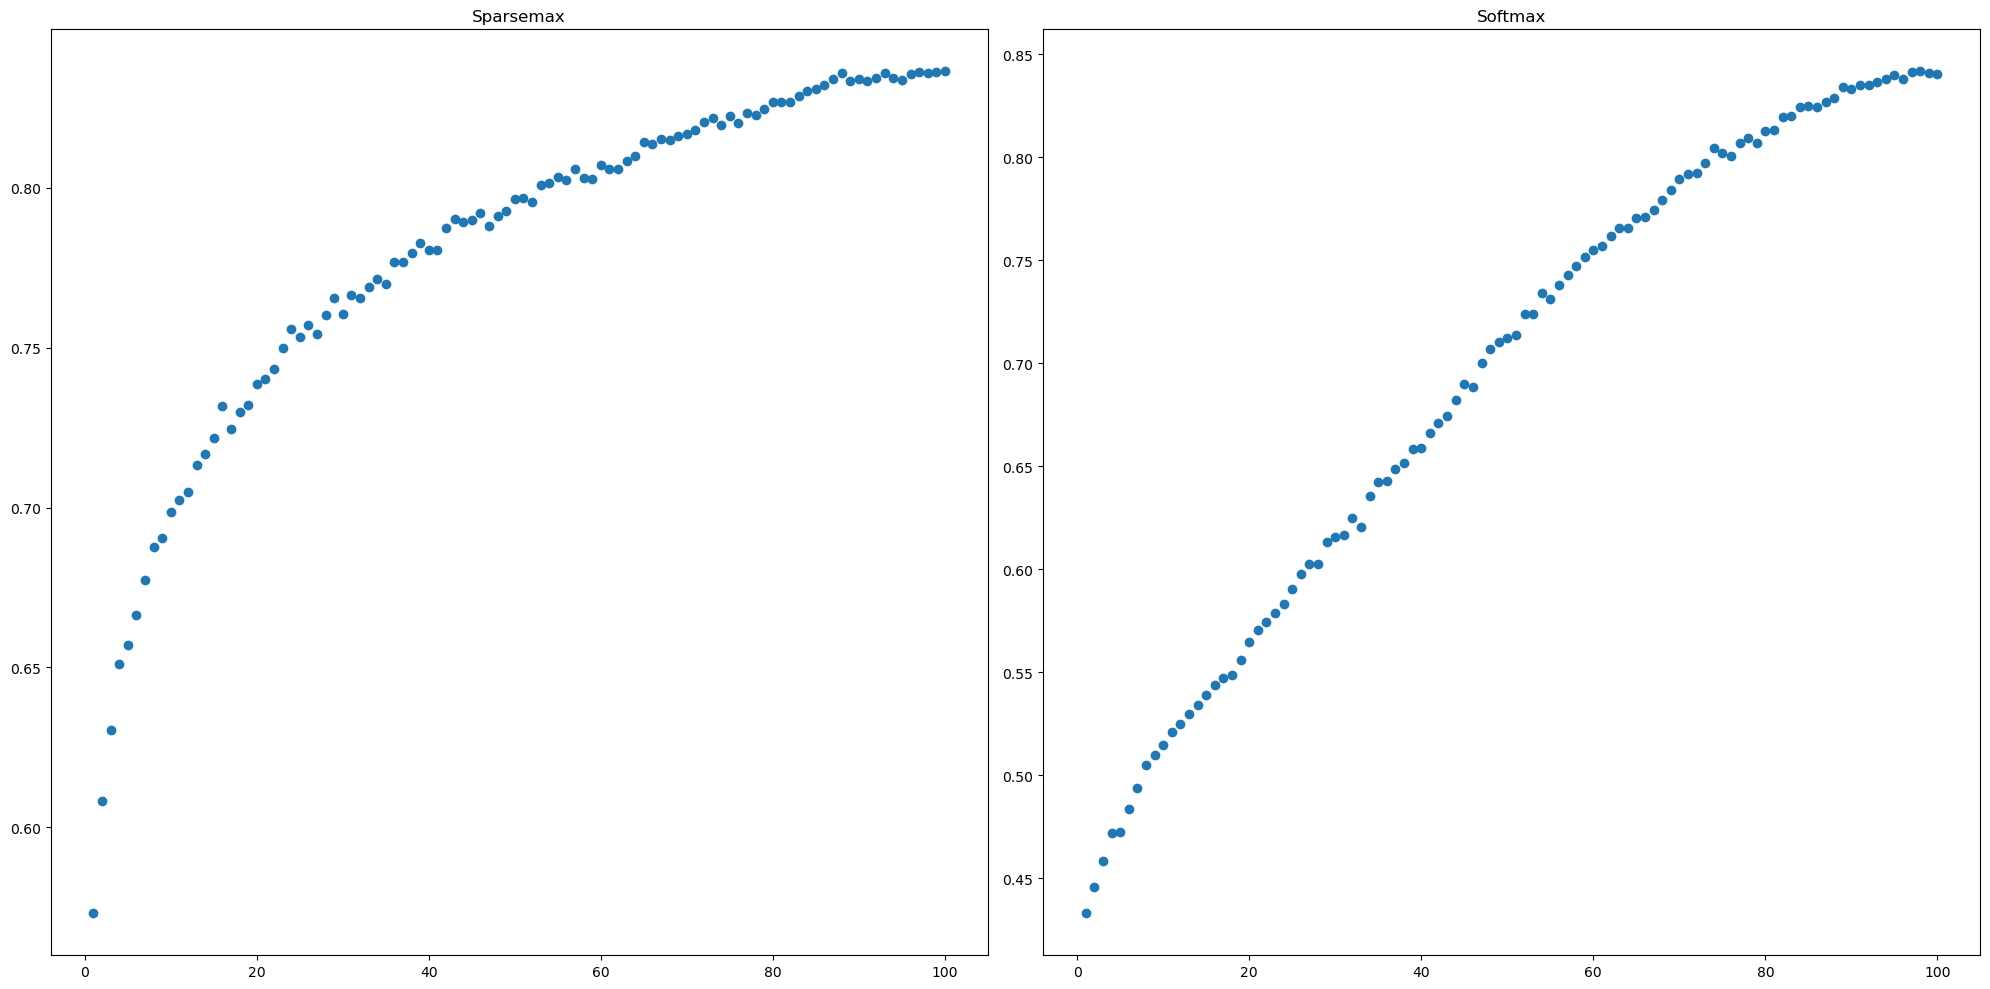

In [5]:
def special_qualitative_plots(compare_metric, models_vector, dfs_by_model, figsize=None):
    


    ncols=len(models_vector)

    if figsize is None:
        figsize=(20, 10)
        print(f"figsize is {figsize}")
    _, axes=plt.subplots(nrows=1, ncols= ncols, figsize=figsize)
    
    for col in range(ncols):
        ax=axes[col]
        if col < len(models_vector):
            model_name=models_vector[col]
            print(f"model_name is {model_name}")

            filtered_df=dfs_by_model[model_name]
            def calculate_title():
                readable_model=get_model_details(model_name)['name']
                return f"{readable_model}: {suptitle}" if ax is None else readable_model
            # plot by rank within sentence
            suptitle="Grouped by rank within sentence"
            ax=plot_grouped(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax, error_bar=False)  
            ax.set_xlabel(None)
            ax.set_ylabel(None)
        else:
            ax.axis('off')

        
    plt.tight_layout()

print(dfs_by_model.keys())
compare_metrics=[compare_metric, compare_metric]
models_vector=["fairseq_sparsemax", "fairseq_softmax"]
special_qualitative_plots(compare_metric=compare_metric, models_vector=models_vector, dfs_by_model=dfs_by_model, figsize=None)


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


Models is ['fairseq_sparsemax', 'fairseq_softmax']


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


{'fairseq_sparsemax': [0.7795926070810641, 1.0009775015790943, 4.3111024928859445, 0.1745587751755143, 5.706019110834449e-08], 'fairseq_softmax': [0.6917414019144233, 2.2004591263002555, 15.987547950936577, 0.40701577924398397, 0.0]}


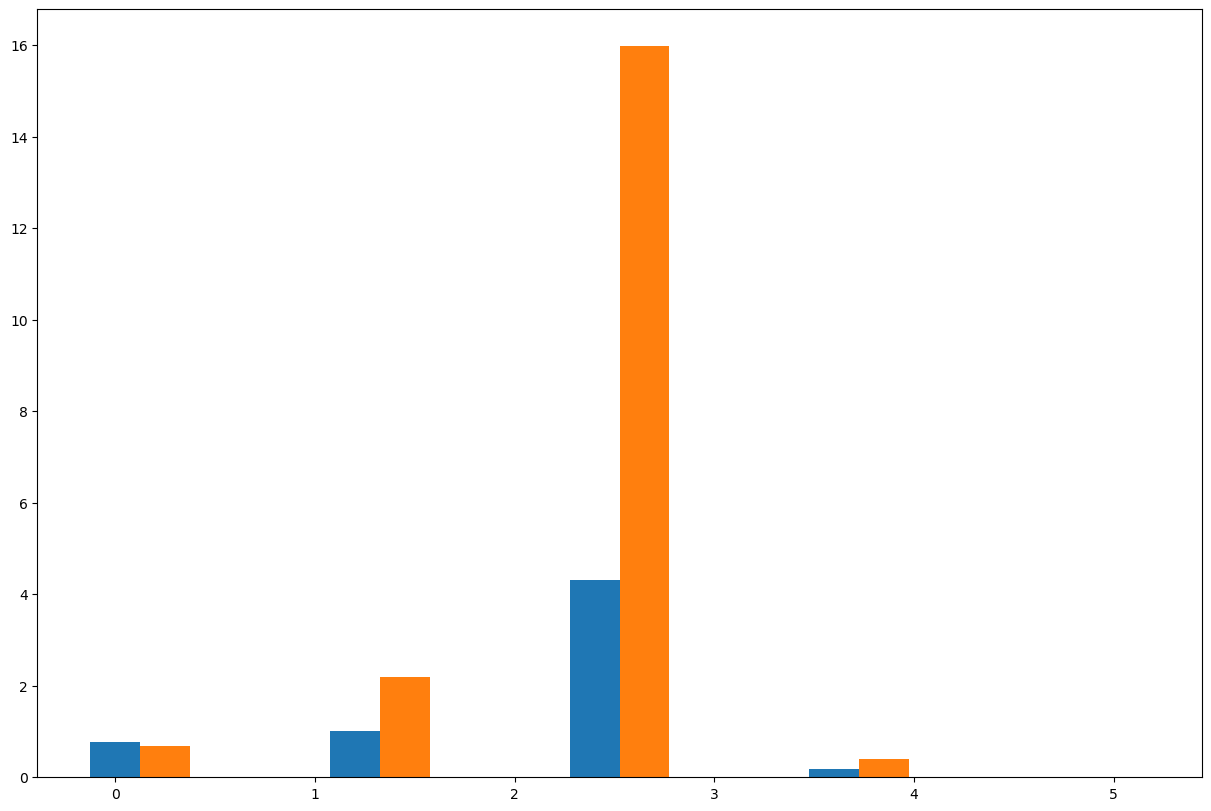

In [23]:
import math

models=list(examples_df["model"].unique())
print(f"Models is {models}")

metrics_dict={}
for model in models:
        metrics=Calculate_Metrics(dfs_by_model[model], compare_metric).get_best_metrics()
        for metric_name, metric_value in metrics.items():
            if metric_name != "model_name":
                append_to_dict(metrics_dict, [metric_name,model ], metric_value)    
    




fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(12,8))

bar_graph_dict={}
for model in models:
    bar_graph_dict[model]=[]

for  metric_name, metric_by_model in metrics_dict.items():

    readable_models= [get_model_details(model_name)['name'] for model_name in models]
    for model in models:
        bar_graph_dict[model].append(float(metric_by_model[model]))

metrics = metrics_dict.keys()
x = np.arange(len(metrics)) *1.2 # the label locations
width = 0.25  # the width of the bars
multiplier = 0


print(bar_graph_dict)

for attribute, measurement in bar_graph_dict.items():
    offset = width * multiplier
    # print(len(x))
    # print(len(x))

    rects = ax.bar(x + offset , measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    # break

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel(metric_name)
# ax.set_xticks(x + width, readable_models, rotation=90)

# plt.show()


In [24]:
for metric_name, values_by_model in metrics_dict.items():
    print(f"\n\n\nmetric_name {metric_name}")
    print(values_by_model)




metric_name Average Score
{'fairseq_sparsemax': 0.7795926070810641, 'fairseq_softmax': 0.6917414019144233}



metric_name Entropy
{'fairseq_sparsemax': 1.0009775015790943, 'fairseq_softmax': 2.2004591263002555}



metric_name Length Bias
{'fairseq_sparsemax': np.float64(4.3111024928859445), 'fairseq_softmax': np.float64(15.987547950936577)}



metric_name PQ Slope
{'fairseq_sparsemax': np.float64(0.1745587751755143), 'fairseq_softmax': np.float64(0.40701577924398397)}



metric_name PQ Dropoff
{'fairseq_sparsemax': np.float64(5.706019110834449e-08), 'fairseq_softmax': np.float64(0.0)}
